In [1]:
#import required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import initializers, regularizers, constraints
import tensorflow.keras.metrics as metrics

from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [49]:
#read input data
df = pd.read_csv('creditcard.csv')

In [50]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
#get brief information about our dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [52]:
#rows,columns
df.shape

(284807, 31)

In [53]:
#check class ratio
print('Valid : Fraud ')
print(round(df['Class'].value_counts()[0]/len(df) * 100,2),':', round(df['Class'].value_counts()[1]/len(df) * 100,2))

Valid : Fraud 
99.83 : 0.17


In [54]:
#check for missing data
print("number of missing data :",df.isnull().any().sum())

number of missing data : 0


C:\Users\rohan\Anaconda3\envs\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


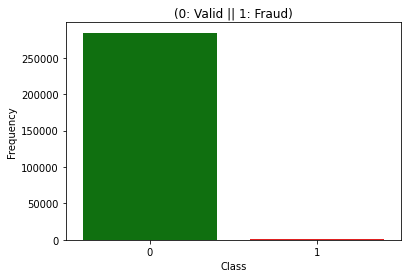

0    284315
1       492
Name: Class, dtype: int64


In [55]:
#create a plot to show class imbalance
colors = ["green", "red"]
sns.countplot('Class', data=df, palette=colors)
plt.title("(0: Valid || 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
numcount = pd.value_counts(df['Class'], sort = True).sort_index()
print(numcount)

C:\Users\rohan\Anaconda3\envs\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


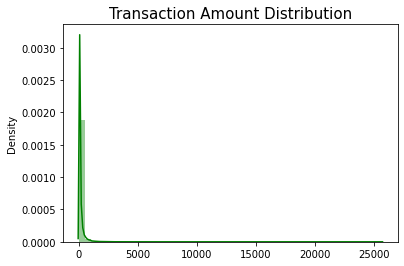

In [56]:
#see distribution of transaction amount to understand our dataset
plt.title('Transaction Amount Distribution', fontsize=15)
amount_val = df['Amount'].values
sns.distplot(amount_val, color="green")

plt.show()

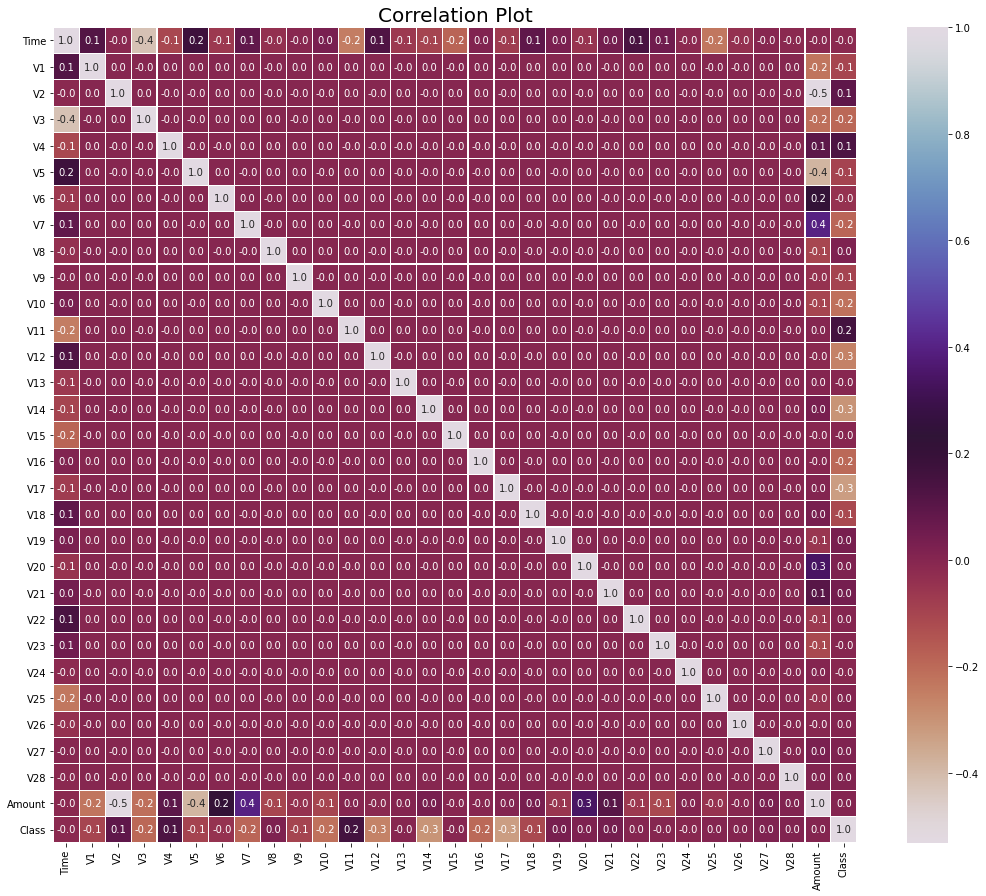

In [59]:
#create correlation plot to see if any of our parameters are correlated
plt.figure(figsize = (18,15))
plt.title('Correlation Plot', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="twilight_r",fmt='.1f',annot=True)
plt.show()

In [27]:
# x = dataset
# y = class
y = df["Class"]
x = df.drop(["Class"], axis = 1)

In [28]:
#get a standerdised distribution of data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [29]:
# split x and y into train and test
X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

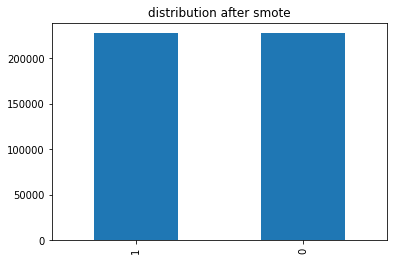

In [35]:
#use smote to deal with class imbalance problem
X_train2, y_train2 = SMOTE().fit_sample(X_train1, y_train1)
#plot training data after smote sampling
pd.Series(y_train2).value_counts().plot(kind="bar")
plt.title("distribution after smote")
plt.show()

In [31]:
#create our NN model to predict class
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(30,), activation = "relu" ))
model.add(tf.keras.layers.Dense(64, activation = "relu" ))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation = "relu" ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation = "relu" ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation = "relu" ))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(8, activation = "relu" ))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid" ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [32]:
# define required metrics to check performance while training
apr = [
    metrics.Accuracy(name="Accuracy"),
    metrics.Precision(name="Precision"),
    metrics.Recall(name="Recall")]

In [33]:
# convert numpy to pandas
X_train2 = pd.DataFrame(X_train2)
y_train2 = pd.DataFrame(y_train2)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [34]:
# complile the model using optimizer and loss function with desired metrics
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = apr)
#define number of epochs
model.fit(X_train2, y_train2, batch_size = 32, epochs = 25)
#evaluate our model on test set
print("Evaluate on test data")
score = model.evaluate(X_test, y_test)
print("test loss, test accuracy, test precision, test recall:", score)

Train on 454908 samples
Epoch 1/25
454908/454908 [==============================] - ETA: 0s - loss: 0.0220 - Accuracy: 0.7518 - Precision: 0.9920 - Recall: 0.994 - 25s 55us/sample - loss: 0.0220 - Accuracy: 0.7519 - Precision: 0.9920 - Recall: 0.9946
Epoch 2/25
454908/454908 [==============================] - 26s 57us/sample - loss: 0.0075 - Accuracy: 0.8564 - Precision: 0.9981 - Recall: 0.9991
Epoch 3/25
454908/454908 [==============================] - 24s 53us/sample - loss: 0.0058 - Accuracy: 0.8870 - Precision: 0.9987 - Recall: 0.9994
Epoch 4/25
454908/454908 [==============================] - 23s 51us/sample - loss: 0.0052 - Accuracy: 0.8926 - Precision: 0.9989 - Recall: 0.9996
Epoch 5/25
454908/454908 [==============================] - 23s 50us/sample - loss: 0.0051 - Accuracy: 0.9111 - Precision: 0.9989 - Recall: 0.9996
Epoch 6/25
454908/454908 [==============================] - 24s 52us/sample - loss: 0.0050 - Accuracy: 0.9140 - Precision: 0.9991 - Recall: 0.9996
Epoch 7/25
454

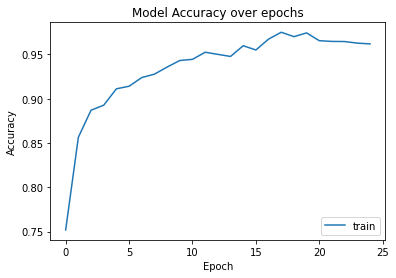

In [40]:
# summarize history for accuracy over epochs
plt.plot(model.history.history['Accuracy'])
plt.title('Model Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='lower right')
plt.show()

In [45]:
print(X_test[:5])

         0         1         2         3         4         5         6   \
0  0.652946 -0.165076  0.640375 -0.031882 -0.428857  0.912752 -0.068876   
1  1.314460 -0.178547  0.564776  0.094306 -0.464077  0.847519 -0.550466   
2  1.214140 -0.824382 -1.457374  0.215132  0.470044  1.716557 -1.332589   
3 -0.924166 -1.264713  0.521171  0.950930  0.742316 -1.345140  1.560034   
4 -1.577551  0.683533 -0.331413  0.486323 -0.150002 -0.804234 -0.394623   

         7         8         9   ...        20        21        22        23  \
0  0.936957 -0.104102 -0.158961  ...  0.241800 -0.281949 -0.597892 -0.418944   
1  0.816419 -0.059504 -0.274963  ... -0.125178 -0.369679 -1.148144 -0.048617   
2 -0.920748  0.276221  0.822673  ...  0.544587  0.954904  1.563302  1.545424   
3  0.412926 -0.203792 -0.237287  ... -1.281307  1.103312  0.953899  0.240401   
4 -0.647813 -0.053311  0.907745  ... -0.164570 -0.189833 -0.102961  0.107380   

         24        25        26        27        28        29  
0 -0

In [47]:
y_test[:3]

,Class
183484,0
255448,0
244749,0
